In [1]:
!pip install torch

DEPRECATION: omegaconf 2.0.6 has a non-standard dependency specifier PyYAML>=5.1.*. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of omegaconf or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063

[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: pip install --upgrade pip


In [2]:
!pip install scikit-learn

DEPRECATION: omegaconf 2.0.6 has a non-standard dependency specifier PyYAML>=5.1.*. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of omegaconf or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063

[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: pip install --upgrade pip


In [3]:
!pip install soundfile pandas

DEPRECATION: omegaconf 2.0.6 has a non-standard dependency specifier PyYAML>=5.1.*. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of omegaconf or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063

[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: pip install --upgrade pip


In [4]:
!pip install pip==24.00

DEPRECATION: omegaconf 2.0.6 has a non-standard dependency specifier PyYAML>=5.1.*. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of omegaconf or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063

[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: pip install --upgrade pip


In [5]:
!pip install pyyaml fairseq

DEPRECATION: omegaconf 2.0.6 has a non-standard dependency specifier PyYAML>=5.1.*. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of omegaconf or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063

[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: pip install --upgrade pip


In [6]:
import os
import torch
import fairseq
import soundfile as sf
import pandas as pd

model_path = './Downloads/wav2vec_small.pt' 
model, cfg, task = fairseq.checkpoint_utils.load_model_ensemble_and_task([model_path])
model = model[0]
model.eval()

# Function to split audio into 2-second chunks
def split_audio_into_chunks(audio, sr, chunk_duration=2):
    chunk_length = chunk_duration * sr
    chunks = []
    for i in range(0, len(audio), chunk_length):
        chunk = audio[i:i + chunk_length]
        if len(chunk) == chunk_length:
            chunks.append(chunk)
    return chunks

# Mean-pool the features over the sequence dimension
def extract_features_from_chunk(chunk, sr):
    audio_tensor = torch.from_numpy(chunk).float().unsqueeze(0)
    with torch.no_grad():
        features = model.feature_extractor(audio_tensor)
    return features.mean(dim=2).squeeze().numpy()  # Mean-pool to reduce to 512-dim

base_path = './Downloads/LibriSpeech/dev-clean/'

features_wav2vec = []
labels = []

# Loop over each speaker directory
for speaker_id in os.listdir(base_path):
    speaker_path = os.path.join(base_path, speaker_id)

    if not os.path.isdir(speaker_path):
        continue

    # Loop over each chapter directory within the speaker directory
    for chapter_id in os.listdir(speaker_path):
        chapter_path = os.path.join(speaker_path, chapter_id)

        if not os.path.isdir(chapter_path):
            continue

        # Loop over each .flac file in the chapter directory
        for audio_file in os.listdir(chapter_path):
            if audio_file.endswith('.flac'):
                file_path = os.path.join(chapter_path, audio_file)

                # Load the audio file using soundfile
                audio, sr = sf.read(file_path)

                if sr != 16000:
                    raise ValueError(f"Expected 16 kHz audio, but got {sr} Hz")

                # Split the audio into 2-second chunks
                chunks = split_audio_into_chunks(audio, sr, chunk_duration=2)

                # Extract features for each chunk
                for chunk in chunks:
                    wav2vec_features = extract_features_from_chunk(chunk, sr)
                    features_wav2vec.append(wav2vec_features)

                    # Store the speaker ID as the label for each chunk
                    labels.append(speaker_id)

df_wav2vec = pd.DataFrame(features_wav2vec)
df_wav2vec['speaker_id'] = labels

print(df_wav2vec.head())


/opt/anaconda3/envs/py-38/lib/python3.8/site-packages/fairseq/checkpoint_utils.py:315: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state = torch.load(f, map_location=torch

          0         1         2         3         4         5         6  \
0 -0.001404 -0.001754 -0.002755 -0.003818  0.004183 -0.000176 -0.005204   
1 -0.000503 -0.003341 -0.006087 -0.006688  0.000049  0.002898 -0.005107   
2  0.003947 -0.004229 -0.006419 -0.001311 -0.001191  0.000322 -0.012550   
3  0.000200 -0.004892 -0.005308 -0.001899  0.000366 -0.000804 -0.007192   
4  0.004775 -0.000642 -0.002916 -0.002573 -0.002124  0.001038 -0.006375   

          7         8         9  ...       503       504       505       506  \
0 -0.000542 -0.002809 -0.002789  ... -0.010994 -0.003477 -0.001138 -0.001333   
1  0.001287 -0.000595 -0.006859  ... -0.009991 -0.005543 -0.003827 -0.004267   
2  0.002113  0.005127  0.001201  ... -0.007397 -0.009213 -0.002939 -0.005889   
3  0.001754 -0.000788 -0.000937  ... -0.008129 -0.004575 -0.005986 -0.002422   
4  0.004824 -0.003284 -0.002922  ... -0.012955 -0.002423 -0.004841  0.001983   

        507       508       509       510       511  speaker_id  
0 

In [7]:
df_wav2vec.info()
print(df_wav2vec['speaker_id'].unique())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8392 entries, 0 to 8391
Columns: 513 entries, 0 to speaker_id
dtypes: float32(512), object(1)
memory usage: 16.5+ MB
['2412' '2078' '3752' '1988' '1919' '422' '3000' '1993' '6313' '251'
 '8842' '5536' '7850' '174' '6295' '7976' '2803' '777' '5694' '1462'
 '5895' '2086' '6241' '2277' '2428' '3536' '2902' '8297' '3081' '6345'
 '652' '3853' '5338' '6319' '3170' '1272' '84' '3576' '1673' '2035']


In [8]:
speaker_distribution = df_wav2vec['speaker_id'].value_counts()
print(speaker_distribution)

speaker_id
422     234
2902    225
1673    221
3576    221
3000    220
2803    219
174     218
5536    217
2078    217
3170    216
8842    215
6319    215
3536    213
1993    213
2086    213
3853    212
1919    212
2412    212
84      211
5338    211
652     210
7850    210
1988    209
7976    208
6345    208
6295    207
6241    206
8297    205
1272    204
2035    204
1462    203
777     203
5895    203
251     201
5694    199
2428    198
6313    198
3752    197
2277    193
3081    191
Name: count, dtype: int64


In [9]:
from sklearn.preprocessing import StandardScaler

X = df_wav2vec.drop(columns=['speaker_id'])
y = df_wav2vec['speaker_id'] 

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

df_wav2vec_scaled = pd.DataFrame(X_scaled, columns=X.columns)
df_wav2vec_scaled['speaker_id'] = y.values

print(df_wav2vec_scaled.head())


          0         1         2         3         4         5         6  \
0 -0.202260 -0.379238 -0.003336 -1.720145  1.223380  0.512232 -1.217481   
1  0.130416 -1.014952 -1.098143 -2.627450 -0.077334  1.540310 -1.190843   
2  1.772127 -1.370834 -1.207283 -0.927517 -0.467649  0.678682 -3.234988   
3  0.389750 -1.636326 -0.842093 -1.113373  0.022243  0.302405 -1.763426   
4  2.077910  0.065797 -0.056374 -1.326554 -0.761335  0.918213 -1.539118   

          7         8         9  ...       503       504       505       506  \
0 -0.871053 -1.023650 -0.939594  ... -0.168650  0.070028 -0.266981  0.038835   
1 -0.291986 -0.282168 -2.113702  ... -0.029996 -0.217042 -1.184250 -0.693944   
2 -0.030352  1.634631  0.211117  ...  0.328952 -0.726726 -0.881460 -1.099045   
3 -0.143961 -0.346686 -0.405651  ...  0.227681 -0.082506 -1.920894 -0.233057   
4  0.827872 -1.182851 -0.977983  ... -0.439909  0.216402 -1.530434  0.867190   

        507       508       509       510       511  speaker_id  
0 

In [10]:

min_samples = df_wav2vec_scaled['speaker_id'].value_counts().min()

balanced_df_list = []

for speaker in df_wav2vec_scaled['speaker_id'].unique():
    speaker_data = df_wav2vec_scaled[df_wav2vec_scaled['speaker_id'] == speaker]
    
    speaker_sample = speaker_data.sample(n=min_samples, random_state=42)
    
    balanced_df_list.append(speaker_sample)
# all the samples to form the balanced dataset
balanced_df = pd.concat(balanced_df_list).reset_index(drop=True)

print(balanced_df['speaker_id'].value_counts())


speaker_id
2412    191
2078    191
6241    191
2277    191
2428    191
3536    191
2902    191
8297    191
3081    191
6345    191
652     191
3853    191
5338    191
6319    191
3170    191
1272    191
84      191
3576    191
1673    191
2086    191
5895    191
1462    191
251     191
3752    191
1988    191
1919    191
422     191
3000    191
1993    191
6313    191
8842    191
5694    191
5536    191
7850    191
174     191
6295    191
7976    191
2803    191
777     191
2035    191
Name: count, dtype: int64


In [11]:
balanced_df.head()

,0,1,2,3,4,5,6,7,8,9,...,503,504,505,506,507,508,509,510,511,speaker_id
0,0.879789,0.619629,0.995388,-1.148168,0.850944,0.389477,-0.120109,-0.972029,-2.588533,-0.508739,...,0.581792,-0.379719,-0.641504,-0.140639,0.812507,1.323760,-1.874978,-0.097249,0.319981,2412
1,1.853667,-0.389782,-2.355821,-0.371712,-1.514147,0.853944,-1.581535,-0.044431,-0.374823,0.846840,...,-0.384061,-0.252104,-1.957268,-0.992617,0.467177,-1.483517,-0.328622,1.220176,1.999246,2412
2,-1.097170,-2.456441,-2.374409,0.091262,-0.934762,0.328336,0.116175,1.426905,-1.658698,1.311378,...,-1.396920,1.370784,-1.228322,-1.578571,1.032655,-0.975369,-2.053172,0.826738,1.577249,2412
3,0.437211,-0.732312,-0.941675,-1.581842,0.811725,0.640072,-0.831419,0.733144,0.400975,-0.575735,...,-0.831704,-0.032520,-0.421388,0.064605,-0.453024,-0.008511,0.006818,0.321484,0.706760,2412
4,1.389604,-0.049969,-0.838506,-1.973586,0.847613,0.431672,-2.039348,-0.347572,-1.639336,-0.974439,...,-0.619036,-1.229071,-2.911623,1.189465,0.786216,-1.866184,1.044574,-0.000190,1.531689,2412


In [12]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

X_balanced = balanced_df.drop(columns=['speaker_id'])
y_balanced = balanced_df['speaker_id']

X_train_bal, X_test_bal, y_train_bal, y_test_bal = train_test_split(
    X_balanced, y_balanced, test_size=0.2, random_state=42, stratify=y_balanced)

rf_bal = RandomForestClassifier(n_estimators=100, random_state=42)
rf_bal.fit(X_train_bal, y_train_bal)

y_pred_bal = rf_bal.predict(X_test_bal)

print("Balanced Dataset - Accuracy:", accuracy_score(y_test_bal, y_pred_bal))
print(classification_report(y_test_bal, y_pred_bal))


Balanced Dataset - Accuracy: 0.9600785340314136
              precision    recall  f1-score   support

        1272       0.97      1.00      0.99        38
        1462       0.90      0.95      0.92        38
        1673       0.95      1.00      0.97        38
         174       0.95      1.00      0.97        38
        1919       0.93      0.97      0.95        38
        1988       1.00      0.97      0.99        38
        1993       1.00      0.95      0.97        38
        2035       0.93      0.95      0.94        39
        2078       0.97      0.97      0.97        38
        2086       0.95      1.00      0.97        38
        2277       0.95      0.90      0.92        39
        2412       0.95      0.95      0.95        38
        2428       0.95      0.97      0.96        38
         251       0.97      0.89      0.93        38
        2803       1.00      1.00      1.00        39
        2902       1.00      1.00      1.00        38
        3000       0.95      0.97

In [13]:
X_original = df_wav2vec_scaled.drop(columns=['speaker_id'])
y_original = df_wav2vec_scaled['speaker_id']

X_train_orig, X_test_orig, y_train_orig, y_test_orig = train_test_split(
    X_original, y_original, test_size=0.2, random_state=42, stratify=y_original)

rf_orig = RandomForestClassifier(n_estimators=100, random_state=42)
rf_orig.fit(X_train_orig, y_train_orig)

y_pred_orig = rf_orig.predict(X_test_orig)

print("Original Dataset - Accuracy:", accuracy_score(y_test_orig, y_pred_orig))
print(classification_report(y_test_orig, y_pred_orig))


Original Dataset - Accuracy: 0.9612864800476474
              precision    recall  f1-score   support

        1272       1.00      1.00      1.00        41
        1462       0.90      0.88      0.89        41
        1673       1.00      1.00      1.00        44
         174       0.98      1.00      0.99        44
        1919       0.98      0.95      0.96        42
        1988       0.95      0.93      0.94        42
        1993       0.98      0.95      0.96        43
        2035       0.85      0.98      0.91        41
        2078       0.96      1.00      0.98        43
        2086       0.93      1.00      0.97        43
        2277       0.95      1.00      0.97        38
        2412       0.95      0.93      0.94        42
        2428       1.00      0.95      0.97        40
         251       0.95      0.93      0.94        40
        2803       0.96      1.00      0.98        44
        2902       1.00      1.00      1.00        45
        3000       0.95      0.95

In [15]:
import torch.nn as nn
import torch.optim as optim
import numpy as np
from sklearn.preprocessing import LabelEncoder
from torch.utils.data import DataLoader, TensorDataset

# Prepare data for PyTorch
X_balanced = balanced_df.drop(columns=['speaker_id']).values.astype(np.float32)
y_balanced = balanced_df['speaker_id'].values

# Encode speaker IDs into numeric labels
label_encoder = LabelEncoder()
y_balanced_encoded = label_encoder.fit_transform(y_balanced)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced_encoded, test_size=0.2, random_state=42, stratify=y_balanced_encoded)

# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train)
y_train_tensor = torch.tensor(y_train)
X_test_tensor = torch.tensor(X_test)
y_test_tensor = torch.tensor(y_test)

class DNN(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(DNN, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_dim, hidden_dim)
        self.fc3 = nn.Linear(hidden_dim, output_dim)
    
    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        out = self.relu(out)
        out = self.fc3(out)
        return out

# Hyperparameters
input_dim = X_train.shape[1]  # 512 features
hidden_dim = 128
output_dim = len(np.unique(y_balanced_encoded))  # Number of speakers

# Initialize model, loss, and optimizer
model = DNN(input_dim, hidden_dim, output_dim)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training function
def train_model(model, criterion, optimizer, X_train, y_train, num_epochs=40):
    model.train()
    for epoch in range(num_epochs):
        optimizer.zero_grad()
        outputs = model(X_train)
        loss = criterion(outputs, y_train)
        loss.backward()
        optimizer.step()
        
        if (epoch+1) % 5 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Train the DNN model
train_model(model, criterion, optimizer, X_train_tensor, y_train_tensor)

# Evaluate the model
def evaluate_model(model, X_test, y_test):
    model.eval()
    with torch.no_grad():
        outputs = model(X_test)
        _, predicted = torch.max(outputs, 1)
        accuracy = (predicted == y_test).sum().item() / y_test.size(0)
        print(f'Accuracy: {accuracy * 100:.2f}%')

# Evaluate the DNN model
evaluate_model(model, X_test_tensor, y_test_tensor)


Epoch [5/40], Loss: 3.4650
Epoch [10/40], Loss: 3.0573
Epoch [15/40], Loss: 2.4891
Epoch [20/40], Loss: 1.8534
Epoch [25/40], Loss: 1.2428
Epoch [30/40], Loss: 0.7634
Epoch [35/40], Loss: 0.4507
Epoch [40/40], Loss: 0.2680
Accuracy: 93.78%


In [16]:
X = df_wav2vec_scaled.drop(columns=['speaker_id']).values.astype(np.float32)
y = df_wav2vec_scaled['speaker_id'].values

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train)
y_train_tensor = torch.tensor(y_train)
X_test_tensor = torch.tensor(X_test)
y_test_tensor = torch.tensor(y_test)

# Define the DNN model with batch size, hidden layer size, and learning rate as hyperparameters
class DNN(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(DNN, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_dim, hidden_dim)
        self.fc3 = nn.Linear(hidden_dim, output_dim)
    
    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        out = self.relu(out)
        out = self.fc3(out)
        return out

def train_model_with_batches(model, criterion, optimizer, train_loader, num_epochs=20):
    model.train()
    for epoch in range(num_epochs):
        running_loss = 0.0
        for X_batch, y_batch in train_loader:
            optimizer.zero_grad()
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        
        # Print loss for every 5th epoch
        if (epoch+1) % 5 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader):.4f}')

# Evaluate the model
def evaluate_model(model, X_test, y_test):
    model.eval()
    with torch.no_grad():
        outputs = model(X_test)
        _, predicted = torch.max(outputs, 1)
        accuracy = (predicted == y_test).sum().item() / y_test.size(0)
        return accuracy

# Hyperparameter grid
batch_sizes = [32, 64, 128]
learning_rates = [0.001, 0.0005, 0.0001]
hidden_dims = [64, 128, 256]
num_epochs = 20

best_accuracy = 0.0
best_params = {}

for batch_size in batch_sizes:
    for lr in learning_rates:
        for hidden_dim in hidden_dims:
            print(f"\nTraining with batch_size={batch_size}, learning_rate={lr}, hidden_dim={hidden_dim}")
            
            # Create DataLoader for current batch size
            train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
            train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
            
            # Initialize the model
            input_dim = X_train.shape[1]  # Number of input features (512)
            output_dim = len(np.unique(y_encoded))  # Number of speakers
            model = DNN(input_dim, hidden_dim, output_dim)
            
            # Initialize optimizer and loss function
            optimizer = optim.Adam(model.parameters(), lr=lr)
            criterion = nn.CrossEntropyLoss()

            # Train the model with the current hyperparameters
            train_model_with_batches(model, criterion, optimizer, train_loader, num_epochs)
            
            # Evaluate the model on the test set
            accuracy = evaluate_model(model, X_test_tensor, y_test_tensor)
            print(f"Accuracy: {accuracy * 100:.2f}%")
            
            # Check if this combination gives the best accuracy
            if accuracy > best_accuracy:
                best_accuracy = accuracy
                best_params = {
                    'batch_size': batch_size,
                    'learning_rate': lr,
                    'hidden_dim': hidden_dim
                }

# Print the best hyperparameters and accuracy
print(f"\nBest Accuracy: {best_accuracy * 100:.2f}%")
print(f"Best Hyperparameters: {best_params}")



Training with batch_size=32, learning_rate=0.001, hidden_dim=64
Epoch [5/20], Loss: 0.0054
Epoch [10/20], Loss: 0.0010
Epoch [15/20], Loss: 0.0004
Epoch [20/20], Loss: 0.0002
Accuracy: 99.58%

Training with batch_size=32, learning_rate=0.001, hidden_dim=128
Epoch [5/20], Loss: 0.0020
Epoch [10/20], Loss: 0.0004
Epoch [15/20], Loss: 0.0002
Epoch [20/20], Loss: 0.0001
Accuracy: 99.70%

Training with batch_size=32, learning_rate=0.001, hidden_dim=256
Epoch [5/20], Loss: 0.0123
Epoch [10/20], Loss: 0.0002
Epoch [15/20], Loss: 0.0001
Epoch [20/20], Loss: 0.0000
Accuracy: 99.52%

Training with batch_size=32, learning_rate=0.0005, hidden_dim=64
Epoch [5/20], Loss: 0.0235
Epoch [10/20], Loss: 0.0037
Epoch [15/20], Loss: 0.0012
Epoch [20/20], Loss: 0.0005
Accuracy: 99.58%

Training with batch_size=32, learning_rate=0.0005, hidden_dim=128
Epoch [5/20], Loss: 0.0081
Epoch [10/20], Loss: 0.0014
Epoch [15/20], Loss: 0.0005
Epoch [20/20], Loss: 0.0002
Accuracy: 99.58%

Training with batch_size=32, 

In [28]:
class DNNWithDropout(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim, dropout_prob=0.3):
        super(DNNWithDropout, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, hidden_dim)
        self.fc3 = nn.Linear(hidden_dim, output_dim)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(dropout_prob) 

    def forward(self, x):
        out = self.relu(self.fc1(x))
        out = self.dropout(out)  
        out = self.relu(self.fc2(out))
        out = self.fc3(out)
        return out

model = DNNWithDropout(input_dim=512, hidden_dim=128, output_dim=len(np.unique(y_encoded)), dropout_prob=0.5)

optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=0.01)  # weight_decay applies L2 regularization


In [29]:

from sklearn.model_selection import KFold
import numpy as np

# Prepare data
X = df_wav2vec_scaled.drop(columns=['speaker_id']).values.astype(np.float32)
y = df_wav2vec_scaled['speaker_id'].values

# Encode speaker IDs into numeric labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Convert data to PyTorch tensors
X_tensor = torch.tensor(X)
y_tensor = torch.tensor(y_encoded)

# Define the DNN model with batch size, hidden layer size, and learning rate as hyperparameters
class DNN(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(DNN, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_dim, hidden_dim)
        self.fc3 = nn.Linear(hidden_dim, output_dim)
    
    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        out = self.relu(out)
        out = self.fc3(out)
        return out

# Training function using mini-batches
def train_model_with_batches(model, criterion, optimizer, train_loader, num_epochs=20):
    model.train()
    for epoch in range(num_epochs):
        running_loss = 0.0
        for X_batch, y_batch in train_loader:
            optimizer.zero_grad()
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        
        # Print loss for every 5th epoch
        if (epoch+1) % 5 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader):.4f}')

# Evaluate the model
def evaluate_model(model, X_test, y_test):
    model.eval()
    with torch.no_grad():
        outputs = model(X_test)
        _, predicted = torch.max(outputs, 1)
        accuracy = (predicted == y_test).sum().item() / y_test.size(0)
        return accuracy

# Hyperparameter grid
batch_sizes = [32, 64, 128]
learning_rates = [0.001, 0.005]
hidden_dims = [64, 128]
num_epochs = 30
num_folds = 5  # Number of K-Folds for cross-validation

# Perform hyperparameter tuning with cross-validation
best_accuracy = 0.0
best_params = {}

kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

for batch_size in batch_sizes:
    for lr in learning_rates:
        for hidden_dim in hidden_dims:
            fold_accuracies = []
            print(f"\nTraining with batch_size={batch_size}, learning_rate={lr}, hidden_dim={hidden_dim}")
            
            # Cross-validation loop
            for fold, (train_idx, test_idx) in enumerate(kf.split(X_tensor)):
                print(f"\nFold {fold+1}/{num_folds}")
                
                # Create train and test tensors for this fold
                X_train_fold, X_test_fold = X_tensor[train_idx], X_tensor[test_idx]
                y_train_fold, y_test_fold = y_tensor[train_idx], y_tensor[test_idx]
                
                # Create DataLoader for current batch size
                train_dataset = TensorDataset(X_train_fold, y_train_fold)
                train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
                
                # Initialize the model
                input_dim = X_train_fold.shape[1]  # Number of input features
                output_dim = len(np.unique(y_encoded))  # Number of speakers
                model = DNN(input_dim, hidden_dim, output_dim)
                
                # Initialize optimizer and loss function
                optimizer = optim.Adam(model.parameters(), lr=lr)
                criterion = nn.CrossEntropyLoss()

                # Train the model for this fold
                train_model_with_batches(model, criterion, optimizer, train_loader, num_epochs)
                
                # Evaluate the model on the test set of this fold
                accuracy = evaluate_model(model, X_test_fold, y_test_fold)
                print(f"Fold {fold+1} Accuracy: {accuracy * 100:.2f}%")
                
                # Store accuracy for this fold
                fold_accuracies.append(accuracy)
            
            # Compute the average accuracy across folds for this hyperparameter combination
            avg_accuracy = np.mean(fold_accuracies)
            print(f"Average Accuracy for batch_size={batch_size}, learning_rate={lr}, hidden_dim={hidden_dim}: {avg_accuracy * 100:.2f}%")
            
            # Check if this combination gives the best accuracy
            if avg_accuracy > best_accuracy:
                best_accuracy = avg_accuracy
                best_params = {
                    'batch_size': batch_size,
                    'learning_rate': lr,
                    'hidden_dim': hidden_dim
                }

# Print the best hyperparameters and accuracy
print(f"\nBest Average Accuracy: {best_accuracy * 100:.2f}%")
print(f"Best Hyperparameters: {best_params}")



Training with batch_size=32, learning_rate=0.001, hidden_dim=64

Fold 1/5
Epoch [5/30], Loss: 0.0063
Epoch [10/30], Loss: 0.0011
Epoch [15/30], Loss: 0.0004
Epoch [20/30], Loss: 0.0002
Epoch [25/30], Loss: 0.0001
Epoch [30/30], Loss: 0.0000
Fold 1 Accuracy: 99.58%

Fold 2/5
Epoch [5/30], Loss: 0.0060
Epoch [10/30], Loss: 0.0010
Epoch [15/30], Loss: 0.0004
Epoch [20/30], Loss: 0.0002
Epoch [25/30], Loss: 0.0001
Epoch [30/30], Loss: 0.0000
Fold 2 Accuracy: 99.64%

Fold 3/5
Epoch [5/30], Loss: 0.0057
Epoch [10/30], Loss: 0.0010
Epoch [15/30], Loss: 0.0004
Epoch [20/30], Loss: 0.0002
Epoch [25/30], Loss: 0.0001
Epoch [30/30], Loss: 0.0000
Fold 3 Accuracy: 99.52%

Fold 4/5
Epoch [5/30], Loss: 0.0059
Epoch [10/30], Loss: 0.0011
Epoch [15/30], Loss: 0.0004
Epoch [20/30], Loss: 0.0002
Epoch [25/30], Loss: 0.0001
Epoch [30/30], Loss: 0.0000
Fold 4 Accuracy: 99.52%

Fold 5/5
Epoch [5/30], Loss: 0.0079
Epoch [10/30], Loss: 0.0011
Epoch [15/30], Loss: 0.0004
Epoch [20/30], Loss: 0.0002
Epoch [25/

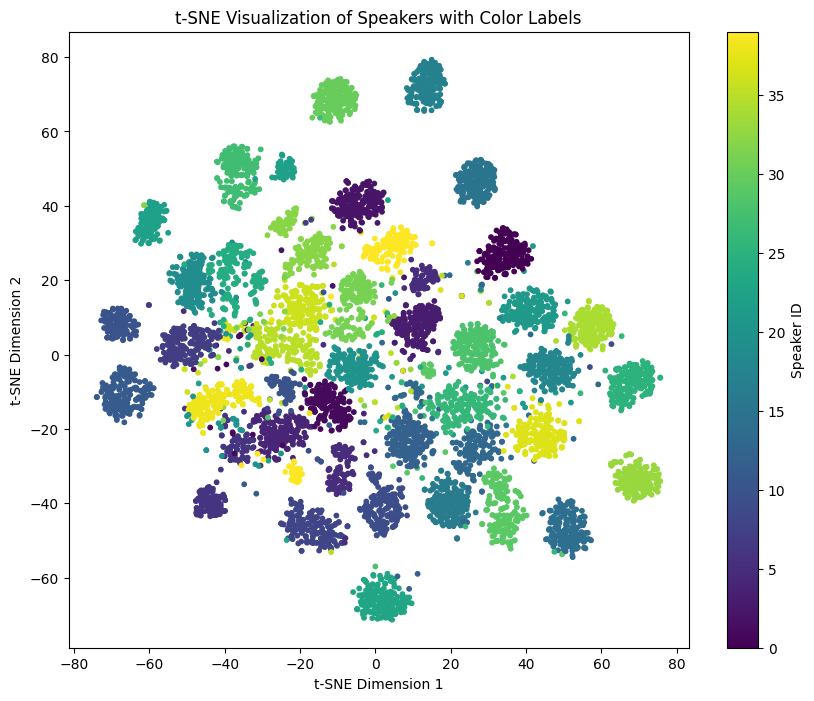

In [25]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

X = balanced_df.drop(columns=['speaker_id'])  
y = balanced_df['speaker_id']  

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)  # This will convert speaker_id to numeric

# Apply t-SNE for dimensionality reduction (reduce to 2D)
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)  # Apply t-SNE on feature columns only (X)

# Plot the 2D t-SNE result and color by encoded speaker ID
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_encoded, cmap='viridis', s=10)  # c=y_encoded for color by speaker_id

cbar = plt.colorbar(scatter)
cbar.set_label('Speaker ID')

plt.title('t-SNE Visualization of Speakers with Color Labels')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.show()

